# Wrangle and Analyze Data



## Table of Contents
- [Introduction](#intro)
- [Gathering data](#gather)
- [Assessing data](#assess)
- [Cleaning data](#clean)
- [Storing, Analyzing, and Visualizing](#storing)

<a id='intro'></a>
## Introduction



The purpose of this project is to put in practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program. The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. 

<a id='gather'></a>
## Gathering data

**1. Twitter archive file**

In [1]:
#import packages and libraries

import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read in the WeRateDogs Twitter archive (.csv file) sent to Udacity via email
#Set as dataframe 'ta'

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.sort_values('timestamp')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [5]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**2. Tweet image prediction**

In [6]:
#Download the dog image prediction files from the Udacity server using the Request library via URL

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [7]:
#Read the dog image prediction .tsv file
#Set as dataframe 'dip'

dip = pd.read_csv('image-predictions.tsv', sep='\t' )

In [8]:
dip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
# Download the tsv file using the Requests library and the given URL
url =' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv', 'wb') as f:
        f.write(r.content)
dip = pd.read_csv('image-predictions.tsv', sep = '\t')
dip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3. Twitter API**

In [10]:
#Keys and Tokens

api_key = "HIDDEN"
api_secret_key = "HIDDEN"
access_token = "HIDDEN"
access_token_secret = "HIDDEN"

In [11]:
#Authentication

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [13]:
# List of tweets

tw_list = []

# List of Exceptions

ex_list = []

# For loop to add each matched tweet json to tw_list
for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # How many favorites the tweet had
        retweets = tweet['retweet_count'] # Count of the retweet
        user_followers = tweet['user']['followers_count'] # How many followers the user had
        user_favourites = tweet['user']['favourites_count'] # How many favorites the user had
        date_time = tweet['created_at'] # The date and time of the creation
        
        tw_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        ex_list.append(tweet_id)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

Rate limit reached. Sleeping for: 225


754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 120


In [14]:
# length of the result
print("Number of Results", len(tw_list))

# length of the errors
print("Number of Errors", len(ex_list))

Number of Results 2331
Number of Errors 25


In [15]:
print("The length of the result", len(tw_list))

The length of the result 2331


In [16]:
# Create DataFrames from json
json_tweets = pd.DataFrame(tw_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [17]:
# Read the saved tweet_json.txt file into a dataframe
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

<a id='assess'></a>
## Assessing data

### Visual assessment

Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes.

In [18]:
# random sample data ta

twitter_archive.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
318,834574053763584002,NaN,NaN,2017-02-23 01:22:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo fully pupared for a shower. H*c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834574053...,13,10,None,doggo,None,None,None
1952,673680198160809984,NaN,NaN,2015-12-07 01:47:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shnuggles. I would kill for Shnuggles....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673680198...,13,10,Shnuggles,None,None,None,None
2052,671486386088865792,NaN,NaN,2015-12-01 00:30:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Malcolm. He just saw a spider. 10/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671486386...,10,10,Malcolm,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
2065,671151324042559489,NaN,NaN,2015-11-30 02:18:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*struggling to breathe properly* 12/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671151324...,12,10,None,None,None,None,None
2310,666786068205871104,NaN,NaN,2015-11-18 01:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unfamiliar with this breed. Ears pointy af. Wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666786068...,2,10,None,None,None,None,None
1603,685943807276412928,NaN,NaN,2016-01-09 21:58:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the newly formed pupper a capella grou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685943807...,8,10,the,None,None,pupper,None
2244,667886921285246976,NaN,NaN,2015-11-21 02:07:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Erik. He's fucken massive. But also ki...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667886921...,11,10,Erik,None,None,None,None
245,845812042753855489,NaN,NaN,2017-03-26 01:38:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate polar bears but this one...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845812042...,13,10,None,None,None,None,None
305,836260088725786625,NaN,NaN,2017-02-27 17:01:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She spent all morning overseeing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836260088...,13,10,Lucy,None,None,None,None


In [19]:
# ta info

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
# random dip sample data

dip.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
104,667832474953625600,https://pbs.twimg.com/media/CUSeGFNW4AAyyHC.jpg,1,miniature_pinscher,0.214200,True,bath_towel,0.146789,False,Chihuahua,0.104152,True
1158,733822306246479872,https://pbs.twimg.com/media/Ci8Pfg_UUAA2m9i.jpg,1,Lhasa,0.457356,True,Shih-Tzu,0.371282,True,Tibetan_terrier,0.048359,True
1163,735137028879360001,https://pbs.twimg.com/media/CjO7OfeWgAAUQy-.jpg,1,Walker_hound,0.413535,True,beagle,0.233891,True,English_foxhound,0.164943,True
1601,799774291445383169,https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg,1,chow,0.316565,True,golden_retriever,0.241929,True,Pomeranian,0.157524,True
484,675483430902214656,https://pbs.twimg.com/media/CV_MmGZU8AAggM6.jpg,1,box_turtle,0.543706,False,terrapin,0.202600,False,loggerhead,0.071122,False
874,698178924120031232,https://pbs.twimg.com/media/CbBuBhbWwAEGH29.jpg,1,Chesapeake_Bay_retriever,0.351868,True,malinois,0.207753,True,Labrador_retriever,0.154606,True
754,688211956440801280,https://pbs.twimg.com/ext_tw_video_thumb/68821...,1,bannister,0.369449,False,four-poster,0.105307,False,shoji,0.098767,False
543,677269281705472000,https://pbs.twimg.com/media/CWYk0WxWoAAEwRt.jpg,1,Shetland_sheepdog,0.656616,True,collie,0.195405,True,German_shepherd,0.013103,True
1728,820690176645140481,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
322,671866342182637568,https://pbs.twimg.com/media/CVLy3zFWoAA93qJ.jpg,1,Labrador_retriever,0.875614,True,Chihuahua,0.032182,True,golden_retriever,0.017232,True


In [21]:
# dip info

dip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# random tweet_data sample data 

tweet_data.sample(25)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
655,789628658055020548,7652,1814,8784338,146203,2016-10-22 00:45:17+00:00
922,752568224206688256,5541,2297,8784347,146203,2016-07-11 18:20:21+00:00
1278,707610948723478529,16915,6329,8784351,146203,2016-03-09 16:56:11+00:00
1668,681302363064414209,3919,1805,8784356,146203,2015-12-28 02:35:15+00:00
965,748932637671223296,5829,2261,8784348,146203,2016-07-01 17:33:49+00:00
681,786286427768250368,8126,2909,8784337,146203,2016-10-12 19:24:27+00:00
256,841439858740625411,12630,3670,8784335,146203,2017-03-14 00:04:30+00:00
523,806542213899489280,10440,2409,8784337,146203,2016-12-07 16:53:43+00:00
1944,673317986296586240,851,244,8784359,146203,2015-12-06 01:48:12+00:00
1580,685906723014619143,7496,2875,8784352,146203,2016-01-09 19:31:20+00:00


In [23]:
# tweet_data info

tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2331 non-null   int64 
 1   favorites        2331 non-null   int64 
 2   retweets         2331 non-null   int64 
 3   user_followers   2331 non-null   int64 
 4   user_favourites  2331 non-null   int64 
 5   date_time        2331 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.4+ KB


<a id='quality'></a>
### Quality

*Completeness, validity, accuracy, consistency (content issues)*

### *twitter_archive*
(1) Remove retweets to keep only original ratings with images.

(2) Remove superfluous rows and columns.

(3) Datatype conversion in_reply_to_status_id to string

(4) Datatype conversion in_reply_to_user_id to string

(5) Datatype conversion retweeted_status_id to string

(6) Datatype conversion retweeted_status_user_id to string

(7) The numerator and denominator columns have invalid values.

(8) Need to Convert Null Values

### *image_prediction*
(1) Drop duplicates

(2) Remove superfluous columns

### *tweet_json*
1. Keep original tweets only


<a id='tidiness'></a>
### Tidiness 

1. Change tweet_id to type int64 in order to merge with the other table
- All tables should be part of one dataset ... need to melt the doggo, floofer, pupper and puppo twitter archive columns into a single 'stage' column

<a id='clean'></a>
## Cleaning Data

In [24]:
# Copy the dataframes 

twitter_archive_clean = twitter_archive.copy()
dip_clean = dip.copy()
tweet_data_clean = tweet_data.copy()

<a id='clean'></a>
The three data sets need to be merged



In [25]:
# merge dip into ta table

twitter_archive_clean = pd.merge(left=twitter_archive_clean,
                                 right=tweet_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [26]:
# merge tweet_data into ta table

twitter_archive_clean = twitter_archive_clean.merge(dip_clean, on='tweet_id', how='inner')

In [27]:
# test merge

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

Melt the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column: 'dog_stage'

In [28]:
# Select melt and stay columns

MELTS_COLUMNS = ['doggo', 'floofer', 'pupper', 'puppo']
STAY_COLUMNS = [x for x in twitter_archive_clean.columns.tolist() if x not in MELTS_COLUMNS]

In [29]:
# Melt the columns

twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars = STAY_COLUMNS, value_vars = MELTS_COLUMNS, 
                         var_name = 'stages', value_name = 'dog_stage')

In [30]:
# Drop superfluous column

twitter_archive_clean = twitter_archive_clean.drop('stages', 1)

In [31]:
# test

print('Value Counts' + '\n')
print(twitter_archive_clean.dog_stage.value_counts())

Value Counts

None       7905
pupper      221
doggo        78
puppo        24
floofer       8
Name: dog_stage, dtype: int64


Remove superfluous rows and columns

In [32]:

# Delete the retweets
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean.retweeted_status_id)]

# Delete duplicated tweet_id
twitter_archive_clean = twitter_archive_clean.drop_duplicates()

# Delete tweets with no pictures
twitter_archive_clean = twitter_archive_clean.dropna(subset = ['jpg_url'])

# Delete columns related to retweet we don't need anymore
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_user_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_timestamp', 1)

# Delete column date_time we imported from the API, it has the same values as timestamp column
twitter_archive_clean = twitter_archive_clean.drop('date_time', 1)

# Convert timestamp to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

# Extract year, month and day to new columns
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

# Finally drop timestamp column
twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

In [33]:
# Test
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage',
 'year',
 'month',
 'day']

Correct Numerators

In [34]:
# Correct

twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

twitter_archive_clean.info()

#First change numerator and denominators type int to float to allow decimals 
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

#Update numerators

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 7053
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2303 non-null   int64  
 1   in_reply_to_status_id  27 non-null     float64
 2   in_reply_to_user_id    27 non-null     float64
 3   source                 2303 non-null   object 
 4   text                   2303 non-null   object 
 5   expanded_urls          2303 non-null   object 
 6   rating_numerator       2303 non-null   float64
 7   rating_denominator     2303 non-null   float64
 8   name                   2303 non-null   object 
 9   favorites              2303 non-null   int64  
 10  retweets               2303 non-null   int64  
 11  user_followers         2303 non-null   int64  
 12  user_favourites        2303 non-null   int64  
 13  jpg_url                2303 non-null   object 
 14  img_num                2303 non-null   int64  
 15  p1  

In [35]:
# Test
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\turki\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
40,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
548,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
603,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1438,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
4721,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


Correct Denominators

In [36]:
# Update both numerators and denominators: 

# Tweets with denominator not equal to 10 
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

# Tweets with no actual ratings
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 832088576586297345]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 810984652412424192]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 682808988178739200]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 835246439529840640]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 686035780142297088]

In [37]:
# Test Only the group dogs cleaned
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10][['tweet_id',
                                                            'text',
                                                            'rating_numerator',
                                                            'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
336,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
722,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
911,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1009,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1034,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1052,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1118,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1194,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
1366,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
1367,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0


Create New Rating Column

In [38]:
# Create a new column with rating in float type to avoid converting all int column to float
twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)

In [39]:
# Test
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,year,month,day,rating
558,785264754247995392,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He requested to be carried around...,https://twitter.com/dog_rates/status/785264754...,12.0,10.0,Doc,7403,...,0.056740,False,chow,0.056137,True,None,2016,10,9,12.0
479,797236660651966464,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Pancake. She loves Batman and winks li...,https://twitter.com/dog_rates/status/797236660...,12.0,10.0,Pancake,20371,...,0.100844,True,kelpie,0.048368,True,None,2016,11,12,12.0
1663,673636718965334016,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,https://twitter.com/dog_rates/status/673636718...,10.0,10.0,a,1066,...,0.019421,False,pug,0.019044,True,None,2015,12,6,10.0
1658,673688752737402881,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He doesn't know how to shoe. 9/10 ...,https://twitter.com/dog_rates/status/673688752...,9.0,10.0,Larry,1220,...,0.234898,True,kuvasz,0.203495,True,None,2015,12,7,9.0
945,724771698126512129,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Nothin better than a doggo and a sunset. 11/10...,https://twitter.com/dog_rates/status/724771698...,11.0,10.0,None,2335,...,0.058788,True,English_setter,0.037208,True,doggo,2016,4,26,11.0


Drop duped jpg_url

In [40]:
#CODE: Delete duplicated jpg_url
twitter_archive_clean = twitter_archive_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [41]:
# Test
sum(twitter_archive_clean['jpg_url'].duplicated())

0

Create column for the image prediction and column for the confidence level

In [43]:
# The first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

# Create a function with nested if to capture the dog type and confidence level
# From the first 'true' prediction
def image(twitter_archive_clean):
    if twitter_archive_clean['p1_dog'] == True:
        dog_type.append(twitter_archive_clean['p1'])
        confidence_list.append(twitter_archive_clean['p1_conf'])
    elif twitter_archive_clean['p2_dog'] == True:
        dog_type.append(twitter_archive_clean['p2'])
        confidence_list.append(twitter_archive_clean['p2_conf'])
    elif twitter_archive_clean['p3_dog'] == True:
        dog_type.append(twitter_archive_clean['p3'])
        confidence_list.append(twitter_archive_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

# Series objects having index the image_prediction_clean column.        
twitter_archive_clean.apply(image, axis=1)

# Create new columns
twitter_archive_clean['dog_type'] = dog_type
twitter_archive_clean['confidence_list'] = confidence_list

# Drop rows that have prediction_list 'error'
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['dog_type'] != 'Error']

In [44]:
# Test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 1 to 7053
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1678 non-null   int64  
 1   in_reply_to_status_id  20 non-null     float64
 2   in_reply_to_user_id    20 non-null     float64
 3   source                 1678 non-null   object 
 4   text                   1678 non-null   object 
 5   expanded_urls          1678 non-null   object 
 6   rating_numerator       1678 non-null   float64
 7   rating_denominator     1678 non-null   float64
 8   name                   1678 non-null   object 
 9   favorites              1678 non-null   int64  
 10  retweets               1678 non-null   int64  
 11  user_followers         1678 non-null   int64  
 12  user_favourites        1678 non-null   int64  
 13  jpg_url                1678 non-null   object 
 14  img_num                1678 non-null   int64  
 15  p1  

Delete superfuous image columns

In [45]:
# Delete columns

twitter_archive_clean = twitter_archive_clean.drop(['img_num', 'p1', 'in_reply_to_status_id',
                         'in_reply_to_user_id', 'expanded_urls',
                            'p1_conf', 'p1_dog', 
                            'p2', 'p2_conf', 
                            'p2_dog', 'p3', 
                            'p3_conf', 
                            'p3_dog'], 1)

In [46]:
# Test
list(twitter_archive_clean)

['tweet_id',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'jpg_url',
 'dog_stage',
 'year',
 'month',
 'day',
 'rating',
 'dog_type',
 'confidence_list']

Change tweet_id from str to int

In [47]:
# Change tweet_id from str to int
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(int)

In [48]:
# Test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 1 to 7053
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1678 non-null   int32  
 1   source              1678 non-null   object 
 2   text                1678 non-null   object 
 3   rating_numerator    1678 non-null   float64
 4   rating_denominator  1678 non-null   float64
 5   name                1678 non-null   object 
 6   favorites           1678 non-null   int64  
 7   retweets            1678 non-null   int64  
 8   user_followers      1678 non-null   int64  
 9   user_favourites     1678 non-null   int64  
 10  jpg_url             1678 non-null   object 
 11  dog_stage           1678 non-null   object 
 12  year                1678 non-null   int64  
 13  month               1678 non-null   int64  
 14  day                 1678 non-null   int64  
 15  rating              1678 non-null   float64
 16  dog_ty

## Store, Analyze, and Visualize Master Data

In [49]:
#Store the clean DataFrame in a CSV file
twitter_archive_clean.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [50]:
# There is a strong relationship between retweets and favorite counts (0.93). 
# As a tweet gains Favorites, one can expect to see retweets to increase and vice versa.

twitter_archive_clean.corr()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,user_followers,user_favourites,year,month,day,rating
tweet_id,1.000000,-0.003946,-0.007773,0.024427,0.036592,0.015520,0.015583,0.006815,-0.011943,-0.036478,0.024508
rating_numerator,-0.003946,1.000000,0.972591,0.063483,0.049241,-0.016062,-0.005202,0.110080,-0.083024,-0.005781,0.236278
rating_denominator,-0.007773,0.972591,1.000000,-0.028948,-0.020645,-0.007500,-0.009696,-0.002374,-0.040049,0.004986,0.009769
favorites,0.024427,0.063483,-0.028948,1.000000,0.930970,-0.065675,-0.009127,0.513437,-0.142217,-0.018926,0.404880
retweets,0.036592,0.049241,-0.020645,0.930970,1.000000,-0.052881,-0.015765,0.315252,-0.078485,-0.037419,0.306255
user_followers,0.015520,-0.016062,-0.007500,-0.065675,-0.052881,1.000000,0.993880,-0.097882,0.025067,0.011281,-0.039128
user_favourites,0.015583,-0.005202,-0.009696,-0.009127,-0.015765,0.993880,1.000000,-0.004779,-0.012825,0.006804,0.018530
year,0.006815,0.110080,-0.002374,0.513437,0.315252,-0.097882,-0.004779,1.000000,-0.705384,-0.087455,0.501498
month,-0.011943,-0.083024,-0.040049,-0.142217,-0.078485,0.025067,-0.012825,-0.705384,1.000000,0.095344,-0.202900
day,-0.036478,-0.005781,0.004986,-0.018926,-0.037419,0.011281,0.006804,-0.087455,0.095344,1.000000,-0.049503


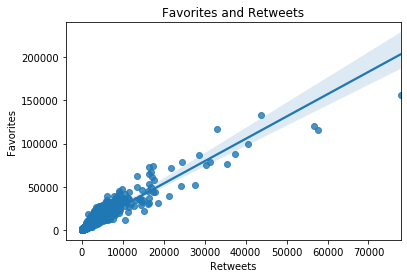

In [51]:
g = sns.regplot(x=twitter_archive_clean.retweets, y=twitter_archive_clean.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()
fig = g.get_figure()
fig.savefig('plot_01.png')

In [52]:
twitter_archive_clean['dog_type'].value_counts()

golden_retriever        157
Labrador_retriever      106
Pembroke                 95
Chihuahua                91
pug                      62
                       ... 
EntleBucher               1
Bouvier_des_Flandres      1
Scotch_terrier            1
Japanese_spaniel          1
Irish_wolfhound           1
Name: dog_type, Length: 113, dtype: int64

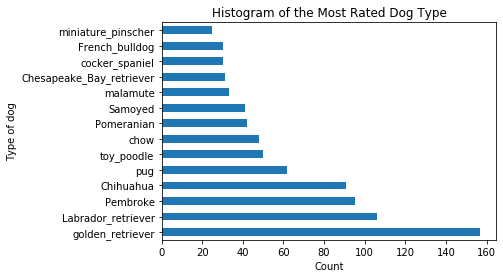

In [53]:
df_dog_type = twitter_archive_clean.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('plot_02.png',bbox_inches='tight');

In [54]:
df_dog_type_mean = twitter_archive_clean.groupby('dog_type').mean()
df_dog_type_mean.head()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,user_followers,user_favourites,year,month,day,rating
dog_type,,,,,,,,,,,
Afghan_hound,-6.765950e+08,9.666667,10.0,15801.666667,5224.666667,8.784336e+06,146203.0,2016.333333,7.666667,11.000000,9.666667
Airedale,2.139754e+08,9.833333,10.0,4827.083333,1226.666667,8.784351e+06,146203.0,2015.583333,8.750000,15.916667,9.833333
American_Staffordshire_terrier,-9.022505e+07,10.133333,10.0,7732.000000,1810.533333,8.784346e+06,146203.0,2016.133333,5.400000,15.866667,10.133333
Appenzeller,-1.285796e+08,11.000000,10.0,6706.000000,1263.000000,8.784344e+06,146203.0,2016.500000,4.500000,18.500000,11.000000
Australian_terrier,-1.579751e+09,11.500000,10.0,10217.500000,2736.000000,8.784343e+06,146203.0,2016.500000,3.500000,7.000000,11.500000


In [55]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

dog_type
Japanese_spaniel                5.000000
soft-coated_wheaten_terrier     8.800000
Scotch_terrier                  9.000000
Walker_hound                    9.000000
Tibetan_terrier                 9.250000
                                 ...    
Border_terrier                 12.142857
Tibetan_mastiff                12.250000
briard                         12.333333
Saluki                         12.500000
Bouvier_des_Flandres           13.000000
Name: rating, Length: 113, dtype: float64

In [56]:
df_dog_type_count = twitter_archive_clean.groupby('dog_type').count()
df_dog_type_count

,tweet_id,source,text,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,user_favourites,jpg_url,dog_stage,year,month,day,rating,confidence_list
dog_type,,,,,,,,,,,,,,,,,
Afghan_hound,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Airedale,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Appenzeller,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
toy_poodle,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
toy_terrier,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
vizsla,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [57]:
dog_type_count = df_dog_type_count['rating']
dog_type_mean = df_dog_type_mean['rating']
dog_type_mean

dog_type
Afghan_hound                       9.666667
Airedale                           9.833333
American_Staffordshire_terrier    10.133333
Appenzeller                       11.000000
Australian_terrier                11.500000
                                    ...    
toy_poodle                        11.020000
toy_terrier                       10.333333
vizsla                            10.846154
whippet                           10.181818
wire-haired_fox_terrier           11.500000
Name: rating, Length: 113, dtype: float64

In [58]:
df = pd.DataFrame()
df['dog_type_count'] = dog_type_count
df['dog_type_mean'] = dog_type_mean
df

,dog_type_count,dog_type_mean
dog_type,,
Afghan_hound,3,9.666667
Airedale,12,9.833333
American_Staffordshire_terrier,15,10.133333
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
...,...,...
toy_poodle,50,11.020000
toy_terrier,3,10.333333
vizsla,13,10.846154


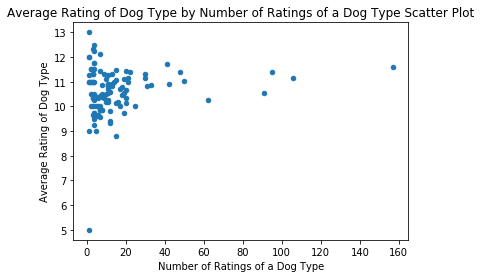

In [59]:
df.plot(x='dog_type_count', y='dog_type_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
fig.savefig('plot_03.png',bbox_inches='tight');

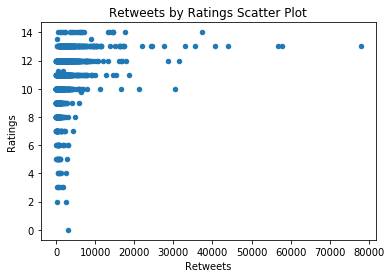

In [60]:
twitter_archive_clean.plot(x='retweets', y='rating', kind='scatter')
plt.xlabel('Retweets')
plt.ylabel('Ratings')
plt.title('Retweets by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('plot_04.png',bbox_inches='tight');